In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [2]:
# data simulation for customer profile table
def generate_customer_profiles_table(n_customers, random_state=0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value 
        
        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])
    
    return customer_profiles_table

In [3]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,62.262521,31.131260,2.179533
1,1,42.365480,64.589411,46.570785,23.285393,3.567092
2,2,96.366276,38.344152,80.213879,40.106939,2.115580
3,3,56.804456,92.559664,11.748426,5.874213,0.348517
4,4,2.021840,83.261985,78.924891,39.462446,3.480049


In [4]:
# data simulation for Terminal profile generation

def generate_terminal_profiles_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Generate terminal properties from random distributions 
    for terminal_id in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])
                                       
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])
    
    return terminal_profiles_table

In [5]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [6]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    # Return the list of terminal IDs
    return available_terminals

In [7]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [8]:
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [9]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values, 
           terminal_profiles_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)


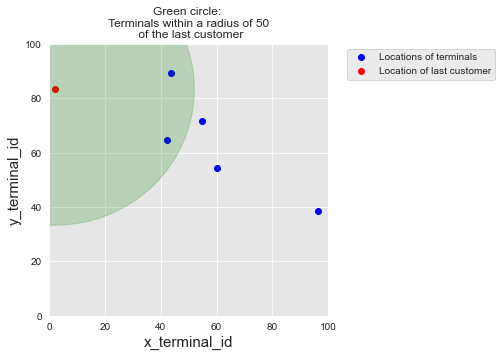

In [10]:
terminals_available_to_customer_fig

In [11]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[1, 4]"
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[2, 3]"


In [12]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that 
                # most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(customer_profile.available_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID, 
                                                      terminal_id, amount])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])
    
    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]
    
    return customer_transactions  
    

In [13]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2022-04-01", 
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2022-04-01 07:19:05,0,3,123.59,26345,0
1,2022-04-01 19:02:02,0,3,46.51,68522,0
2,2022-04-01 18:00:16,0,0,77.34,64816,0
3,2022-04-02 15:13:02,0,2,32.35,141182,1
4,2022-04-02 14:05:38,0,3,63.30,137138,1
5,2022-04-02 15:46:51,0,3,13.59,143211,1
6,2022-04-02 08:51:06,0,2,54.72,118266,1
7,2022-04-02 20:24:47,0,3,51.89,159887,1
8,2022-04-03 12:15:47,0,2,117.91,216947,2
9,2022-04-03 08:50:09,0,1,67.72,204609,2


In [14]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,123.59,26345,0
1,2018-04-01 19:02:02,0,3,46.51,68522,0
2,2018-04-01 18:00:16,0,0,77.34,64816,0
3,2018-04-02 15:13:02,0,2,32.35,141182,1
4,2018-04-02 14:05:38,0,3,63.30,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,2,111.38,373279,4
61,2018-04-05 06:59:59,4,3,80.36,370799,4
62,2018-04-05 17:23:34,4,2,53.25,408214,4
63,2018-04-05 12:51:38,4,2,36.44,391898,4


In [15]:
def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2018-04-01", r=5):
    
    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    # With Pandarallel
    #customer_profiles_table['available_terminals'] = customer_profiles_table.parallel_apply(lambda x : get_list_closest_terminals(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    #transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))
    
    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)
    
    return (customer_profiles_table, terminal_profiles_table, transactions_df)
    

In [16]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days=183, 
                     start_date="2018-04-01", 
                     r=5)

Time to generate customer profiles table: 0.11s
Time to generate terminal profiles table: 0.081s
Time to associate terminals to customers: 3.5s
Time to generate transactions: 1.6e+02s


In [17]:
transactions_df.shape

(1754155, 7)

In [18]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0
...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182


In [19]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

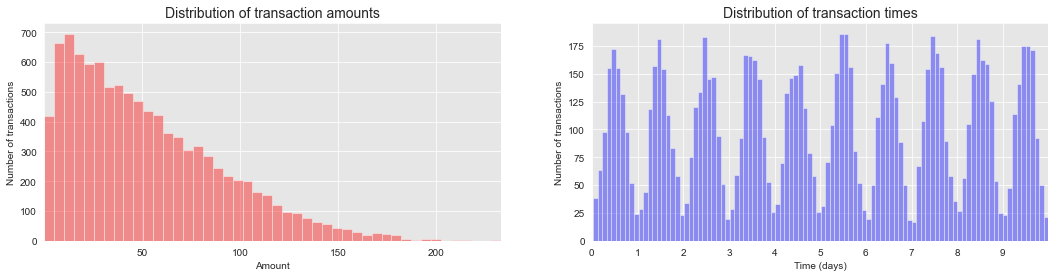

In [20]:
distribution_amount_times_fig

In [21]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    
    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0
    
    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>220, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))
    
    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        
        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)
        
        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) & 
                                                    (transactions_df.TX_TIME_DAYS<day+28) & 
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]
                            
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2
    
    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))
    
    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):
        
        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values
        
        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) & 
                                                    (transactions_df.TX_TIME_DAYS<day+14) & 
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]
        
        nb_compromised_transactions=len(compromised_transactions)
        
        
        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))
        
        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3
        
                             
    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))
    
    return transactions_df                 

In [22]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 978
Number of frauds from scenario 2: 9099
Number of frauds from scenario 3: 4604
Wall time: 2min 16s


In [23]:
transactions_df.TX_FRAUD.mean()

0.008369271814634397

In [24]:
transactions_df.TX_FRAUD.sum()

14681

In [25]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [26]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(973, 9)

In [27]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(9077, 9)

In [28]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(4631, 9)

In [29]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()
    
    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [30]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

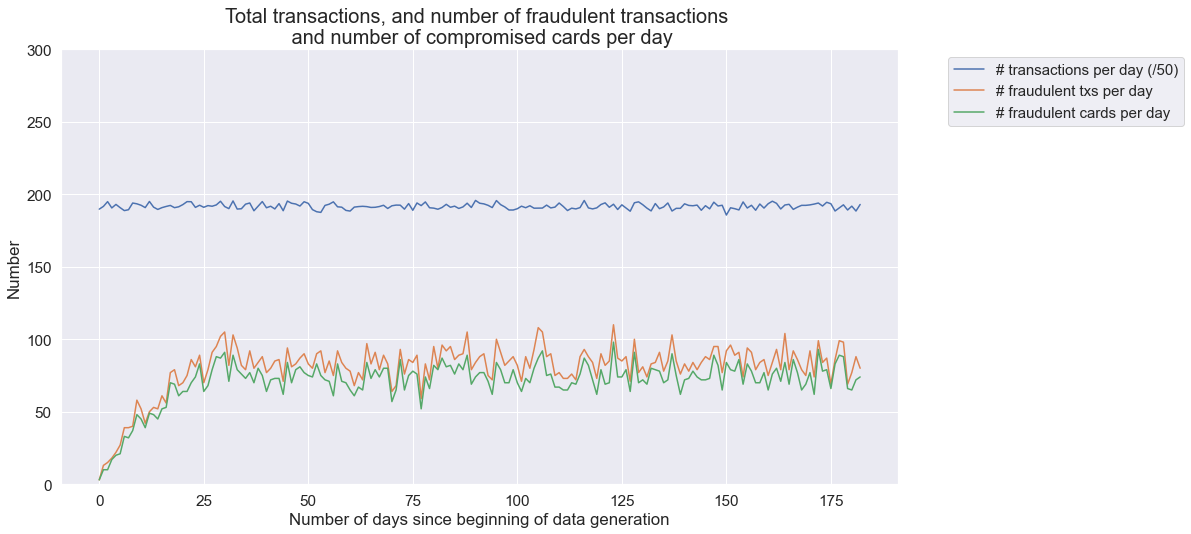

In [31]:
fraud_and_transactions_stats_fig

In [32]:
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)


In [33]:

print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

1754155 transactions loaded, containing 14681 fraudulent transactions


In [34]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [35]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB


In [36]:
def is_weekend(tx_datetime):
    
    # Transform date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5
    
    return int(is_weekend)

In [37]:
transactions_df['TX_DURING_WEEKEND']=transactions_df.TX_DATETIME.apply(is_weekend)

In [38]:
def is_night(tx_datetime):
    
    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6, and 0 otherwise
    is_night = tx_hour<=6
    
    return int(is_night)

In [39]:
%time transactions_df['TX_DURING_NIGHT']=transactions_df.TX_DATETIME.apply(is_night)

Wall time: 6.83 s


In [40]:
transactions_df[transactions_df.TX_TIME_DAYS>=30]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT
288062,288062,2018-05-01 00:01:21,3546,2944,18.71,2592081,30,0,0,0,1
288063,288063,2018-05-01 00:01:48,206,3521,18.60,2592108,30,0,0,0,1
288064,288064,2018-05-01 00:02:22,2610,4470,66.67,2592142,30,0,0,0,1
288065,288065,2018-05-01 00:03:15,4578,1520,79.41,2592195,30,0,0,0,1
288066,288066,2018-05-01 00:03:51,1246,7809,52.08,2592231,30,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0


In [41]:
def get_customer_spending_behaviour_features(customer_transactions, windows_size_in_days=[1,7,30]):
    
    # Let us first order transactions chronologically
    customer_transactions=customer_transactions.sort_values('TX_DATETIME')
    
    # The transaction date and time is set as the index, which will allow the use of the rolling function 
    customer_transactions.index=customer_transactions.TX_DATETIME
    
    # For each window size
    for window_size in windows_size_in_days:
        
        # Compute the sum of the transaction amounts and the number of transactions for the given window size
        SUM_AMOUNT_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').sum()
        NB_TX_WINDOW=customer_transactions['TX_AMOUNT'].rolling(str(window_size)+'d').count()
    
        # Compute the average transaction amount for the given window size
        # NB_TX_WINDOW is always >0 since current transaction is always included
        AVG_AMOUNT_TX_WINDOW=SUM_AMOUNT_TX_WINDOW/NB_TX_WINDOW
    
        # Save feature values
        customer_transactions['CUSTOMER_ID_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        customer_transactions['CUSTOMER_ID_AVG_AMOUNT_'+str(window_size)+'DAY_WINDOW']=list(AVG_AMOUNT_TX_WINDOW)
    
    # Reindex according to transaction IDs
    customer_transactions.index=customer_transactions.TRANSACTION_ID
        
    # And return the dataframe with the new features
    return customer_transactions

In [42]:
spending_behaviour_customer_0=get_customer_spending_behaviour_features(transactions_df[transactions_df.CUSTOMER_ID==0])
spending_behaviour_customer_0

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,
1758,1758,2018-04-01 07:19:05,0,6076,123.59,26345,0,0,0,1,0,1.0,123.590000,1.0,123.590000,1.0,123.590000
8275,8275,2018-04-01 18:00:16,0,858,77.34,64816,0,0,0,1,0,2.0,100.465000,2.0,100.465000,2.0,100.465000
8640,8640,2018-04-01 19:02:02,0,6698,46.51,68522,0,0,0,1,0,3.0,82.480000,3.0,82.480000,3.0,82.480000
12169,12169,2018-04-02 08:51:06,0,6569,54.72,118266,1,0,0,0,0,3.0,59.523333,4.0,75.540000,4.0,75.540000
15764,15764,2018-04-02 14:05:38,0,7707,63.30,137138,1,0,0,0,0,4.0,60.467500,5.0,73.092000,5.0,73.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750390,1750390,2018-09-30 13:38:41,0,3096,38.23,15773921,182,0,0,1,0,5.0,64.388000,28.0,57.306429,89.0,63.097640
1750758,1750758,2018-09-30 14:10:21,0,9441,43.60,15775821,182,0,0,1,0,6.0,60.923333,29.0,56.833793,89.0,62.433933
1751039,1751039,2018-09-30 14:34:30,0,1138,69.69,15777270,182,0,0,1,0,7.0,62.175714,29.0,57.872414,90.0,62.514556


In [43]:
%time transactions_df=transactions_df.groupby('CUSTOMER_ID').apply(lambda x: get_customer_spending_behaviour_features(x, windows_size_in_days=[1,7,30]))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

Wall time: 58.9 s


In [44]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,1,1.0,57.160000,1.0,57.160000,1.0,57.160000
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,1,1.0,81.510000,1.0,81.510000,1.0,81.510000
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,1,1.0,64.490000,1.0,64.490000,1.0,64.490000
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,1,1.0,50.990000,1.0,50.990000,1.0,50.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,0,2.0,75.280000,12.0,67.047500,72.0,69.521111
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,0,1.0,1.230000,21.0,22.173810,93.0,24.780753
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,0,5.0,7.368000,21.0,7.400476,65.0,7.864462
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,0,3.0,100.696667,16.0,107.052500,51.0,102.919608


In [45]:
NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY

RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW

NameError: name 'NB_FRAUD_DELAY_WINDOW' is not defined

In [46]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"):
    
    terminal_transactions=terminal_transactions.sort_values('TX_DATETIME')
    
    terminal_transactions.index=terminal_transactions.TX_DATETIME
    
    NB_FRAUD_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').sum()
    NB_TX_DELAY=terminal_transactions['TX_FRAUD'].rolling(str(delay_period)+'d').count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['TX_FRAUD'].rolling(str(delay_period+window_size)+'d').count()
    
        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
    terminal_transactions.index=terminal_transactions.TRANSACTION_ID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions

In [47]:
transactions_df[transactions_df.TX_FRAUD==1]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW
3527,3527,2018-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,0,3.0,158.073333,3.0,158.073333,3.0,158.073333
5789,5790,2018-04-01 13:31:48,4944,6050,222.26,48708,0,1,1,1,0,2.0,127.605000,2.0,127.605000,2.0,127.605000
6549,6549,2018-04-01 14:42:02,4625,9102,226.40,52922,0,1,1,1,0,4.0,167.165000,4.0,167.165000,4.0,167.165000
9583,9583,2018-04-02 01:01:05,3814,6893,59.15,90065,1,1,3,0,1,6.0,29.138333,6.0,29.138333,6.0,29.138333
10356,10355,2018-04-02 05:03:35,2513,1143,222.04,104615,1,1,1,0,1,5.0,123.740000,5.0,123.740000,5.0,123.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753524,1753524,2018-09-30 19:51:48,1671,3192,128.60,15796308,182,1,3,1,0,6.0,138.358333,25.0,106.957200,82.0,75.621341
1753600,1753600,2018-09-30 20:09:00,4166,632,17.39,15797340,182,1,2,1,0,3.0,19.766667,19.0,15.984737,86.0,15.846512
1753673,1753673,2018-09-30 20:30:52,4097,1558,24.04,15798652,182,1,2,1,0,3.0,23.050000,16.0,40.440625,63.0,41.877460
1754014,1754014,2018-09-30 22:27:04,100,8604,73.85,15805624,182,1,3,1,0,2.0,48.010000,26.0,30.384231,103.0,23.627184


In [48]:
transactions_df[transactions_df.TX_FRAUD==0].TERMINAL_ID[0]

3156

In [49]:
get_count_risk_rolling_window(transactions_df[transactions_df.TERMINAL_ID==3059], delay_period=7, windows_size_in_days=[1,7,30])

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
3527,3527,2018-04-01 10:17:43,3774,3059,225.41,37063,0,1,1,1,...,3.0,158.073333,3.0,158.073333,0.0,0.0,0.0,0.0,0.0,0.0
4732,4732,2018-04-01 11:59:14,55,3059,36.28,43154,0,0,0,1,...,2.0,35.670000,2.0,35.670000,0.0,0.0,0.0,0.0,0.0,0.0
16216,16216,2018-04-02 14:47:34,4879,3059,105.00,139654,1,0,0,0,...,10.0,76.010000,10.0,76.010000,0.0,0.0,0.0,0.0,0.0,0.0
18249,18249,2018-04-02 19:08:10,2263,3059,90.89,155290,1,0,0,0,...,7.0,50.458571,7.0,50.458571,0.0,0.0,0.0,0.0,0.0,0.0
26512,26512,2018-04-03 15:44:49,4879,3059,58.51,229489,2,0,0,0,...,14.0,71.070000,14.0,71.070000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697944,1697944,2018-09-25 05:32:56,402,3059,57.30,15312776,177,0,0,0,...,14.0,65.167857,46.0,68.163261,1.0,0.0,9.0,0.0,36.0,0.0
1701971,1701971,2018-09-25 12:30:54,1035,3059,7.56,15337854,177,0,0,0,...,23.0,7.052174,107.0,6.763738,2.0,0.0,10.0,0.0,36.0,0.0
1704512,1704512,2018-09-25 16:37:41,1519,3059,35.79,15352661,177,0,0,0,...,7.0,41.404286,30.0,46.780000,1.0,0.0,9.0,0.0,36.0,0.0


In [50]:
%time transactions_df=transactions_df.groupby('TERMINAL_ID').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="TERMINAL_ID"))
transactions_df=transactions_df.sort_values('TX_DATETIME').reset_index(drop=True)

Wall time: 2min 7s


In [51]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.00000
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.00000
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.00000
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.00000
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,1754150,2018-09-30 23:56:36,161,655,54.24,15810996,182,0,0,1,...,12.0,67.047500,72.0,69.521111,1.0,0.0,4.0,0.0,28.0,0.00000
1754151,1754151,2018-09-30 23:57:38,4342,6181,1.23,15811058,182,0,0,1,...,21.0,22.173810,93.0,24.780753,1.0,0.0,9.0,0.0,39.0,0.00000
1754152,1754152,2018-09-30 23:58:21,618,1502,6.62,15811101,182,0,0,1,...,21.0,7.400476,65.0,7.864462,1.0,0.0,5.0,0.0,33.0,0.00000
1754153,1754153,2018-09-30 23:59:52,4056,3067,55.40,15811192,182,0,0,1,...,16.0,107.052500,51.0,102.919608,1.0,0.0,6.0,0.0,28.0,0.00000


In [52]:
DIR_OUTPUT = "./simulated-data-transformed/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):
    
    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [53]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 23 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   TRANSACTION_ID                       int64         
 1   TX_DATETIME                          datetime64[ns]
 2   CUSTOMER_ID                          int64         
 3   TERMINAL_ID                          int64         
 4   TX_AMOUNT                            float64       
 5   TX_TIME_SECONDS                      int64         
 6   TX_TIME_DAYS                         int64         
 7   TX_FRAUD                             int64         
 8   TX_FRAUD_SCENARIO                    int64         
 9   TX_DURING_WEEKEND                    int64         
 10  TX_DURING_NIGHT                      int64         
 11  CUSTOMER_ID_NB_TX_1DAY_WINDOW        float64       
 12  CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW   float64       
 13  CUSTOMER_ID_NB_TX_7DAY_WIND

In [54]:
Y = transactions_df['TX_FRAUD']

In [55]:
x = transactions_df.drop(columns= ['TX_FRAUD_SCENARIO','TERMINAL_ID','CUSTOMER_ID','TX_DATETIME','TRANSACTION_ID','TX_TIME_DAYS','TX_TIME_SECONDS'], axis=0)

In [56]:
x

,TX_AMOUNT,TX_FRAUD,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,57.16,0,1,1,1.0,57.160000,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.00000
1,81.51,0,1,1,1.0,81.510000,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.00000
2,146.00,0,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.00000
3,64.49,0,1,1,1.0,64.490000,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.00000
4,50.99,0,1,1,1.0,50.990000,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754150,54.24,0,1,0,2.0,75.280000,12.0,67.047500,72.0,69.521111,1.0,0.0,4.0,0.0,28.0,0.00000
1754151,1.23,0,1,0,1.0,1.230000,21.0,22.173810,93.0,24.780753,1.0,0.0,9.0,0.0,39.0,0.00000
1754152,6.62,0,1,0,5.0,7.368000,21.0,7.400476,65.0,7.864462,1.0,0.0,5.0,0.0,33.0,0.00000
1754153,55.40,0,1,0,3.0,100.696667,16.0,107.052500,51.0,102.919608,1.0,0.0,6.0,0.0,28.0,0.00000


In [57]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1754150    0
1754151    0
1754152    0
1754153    0
1754154    0
Name: TX_FRAUD, Length: 1754155, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [61]:
x_train,x_test, y_train, y_test = train_test_split(x,Y, test_size=0.25 , random_state = 1)

In [63]:
#Logistic Regression
LG = LogisticRegression()
LG_model = LG.fit(x_train,y_train)
LG_predict = LG_model.predict(x_test)
print(classification_report(LG_predict,y_test))
print("Accuracy: ", accuracy_score(LG_predict,y_test))

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    434695
           1       0.98      0.94      0.96      3844

    accuracy                           1.00    438539
   macro avg       0.99      0.97      0.98    438539
weighted avg       1.00      1.00      1.00    438539

Accuracy:  0.9993546754108529


In [70]:
#Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=2)
DT_model = DT.fit(x_train,y_train)
DT_predict = DT_model.predict(x_test)
print(classification_report(DT_predict,y_test))
print("Accuracy: ", accuracy_score(DT_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    434850
           1       1.00      1.00      1.00      3689

    accuracy                           1.00    438539
   macro avg       1.00      1.00      1.00    438539
weighted avg       1.00      1.00      1.00    438539

Accuracy:  1.0


In [69]:
#Xgboost classification

xgboost = xgb.XGBClassifier()
xgb_model = xgboost.fit(x_train,y_train)
xgb_predict = xgb_model.predict(x_test)
print(classification_report(xgb_predict,y_test))
print("Accuracy: ", accuracy_score(xgb_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    434850
           1       1.00      1.00      1.00      3689

    accuracy                           1.00    438539
   macro avg       1.00      1.00      1.00    438539
weighted avg       1.00      1.00      1.00    438539

Accuracy:  1.0


In [73]:
from sklearn.metrics import roc_curve , auc

#Logistic_Regression
fpr1 , tpr1 , thresholds_1 = roc_curve(LG_predict,y_test)
roc_auc1 = auc(fpr1,tpr1)

#Decision Tree
fpr2 , tpr2 , thresholds_2 = roc_curve(DT_predict,y_test)
roc_auc2 = auc(fpr2,tpr2)

#Xgboost classification
fpr3 , tpr3 , thresholds_3 = roc_curve(xgb_predict,y_test)
roc_auc3 = auc(fpr3,tpr3)


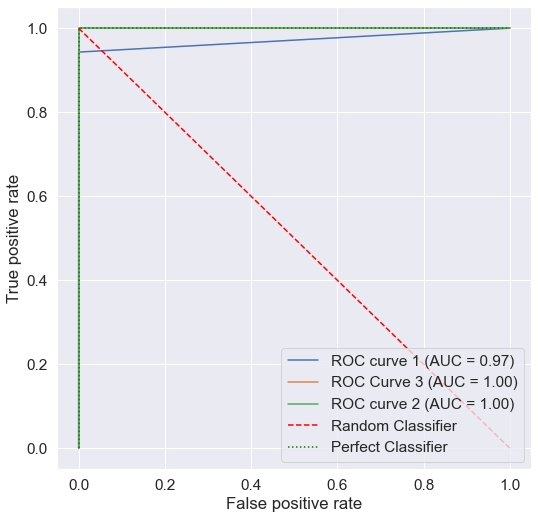

In [75]:
fig,ax = plt.subplots(figsize=(8.5,8.5))

plt.plot(fpr1,tpr1,label ='ROC curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot(fpr3,tpr3, label = 'ROC Curve 3 (AUC = %0.2f)' % (roc_auc3))
plt.plot(fpr2,tpr2,label ='ROC curve 2 (AUC = %0.2f)' % (roc_auc2))
plt.plot([0,1],[1,0],linestyle ='--', color='red', label ='Random Classifier')
plt.plot([0,0,1],[0,1,1],linestyle =':', color='green', label ='Perfect Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [78]:
#Decision Tree , Xg boost model is performing well than Logistic Regression. 

In [77]:
import pickle
pickle.dump(DT_model , open("DT_model.pkl" , 'wb'))